In [1]:
import gym
import agent as my_agent
import torch
import variable as v
from tqdm import tqdm
import utils
import matplotlib.pyplot as plt
from copy import deepcopy

In [21]:
env = gym.make('Breakout-ram-v0')
train_session = None

In [33]:
num_action = env.action_space.n
dim_state = env.observation_space.shape
dim_state = np.prod(dim_state)
seed = 79 #78

4

## Base Agent

In [23]:
actor_archi = [{'type': 'linear', 'in': dim_state, 'out': 512, 'activation': 'relu', 'kwargs': {}}, 
                {'type': 'linear', 'in': 512, 'out': 256, 'activation': 'relu', 'kwargs': {}},
                {'type': 'linear', 'in': 256, 'out': num_action, 'activation': 'softmax', 'kwargs': {'dim': 0}}]

critic_archi = [{'type': 'linear', 'in': dim_state, 'out': 256, 'activation': 'relu', 'kwargs': {}}, 
            {'type': 'linear', 'in': 256, 'out': 512, 'activation': 'relu', 'kwargs': {}},
            {'type': 'linear', 'in': 512, 'out': 1, 'activation': 'None', 'kwargs': {}}]

a2c_agent_init = {
    'seed': seed,
    'discount_factor': .99,
    'num_action': num_action,
    'actor_init': {
        'seed': seed,
        'nn_archi': actor_archi,
        'entropy_learning_rate': 0.05
    },
    'critic_init': {
        'seed': seed,
        'nn_archi': critic_archi
    },
    'optim_actor': {'lr': 5e-4},
    'optim_critic': {'lr': 5e-4},
}

### To compare Agent(s)

In [24]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [25]:
agents_created = {'a2c_agent': my_agent.A2CAgent(a2c_agent_init)}
manual_agent_names = train_session.append_agents(agents_created)

In [26]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- a2c_agent


In [31]:
n_episode = 8
t_max_per_episode = 1000
graphical = True

In [32]:
train_session.train(n_episode=n_episode, graphical=graphical, agent_subset=manual_agent_names)

100%|██████████| 8/8 [00:25<00:00,  3.19s/it]


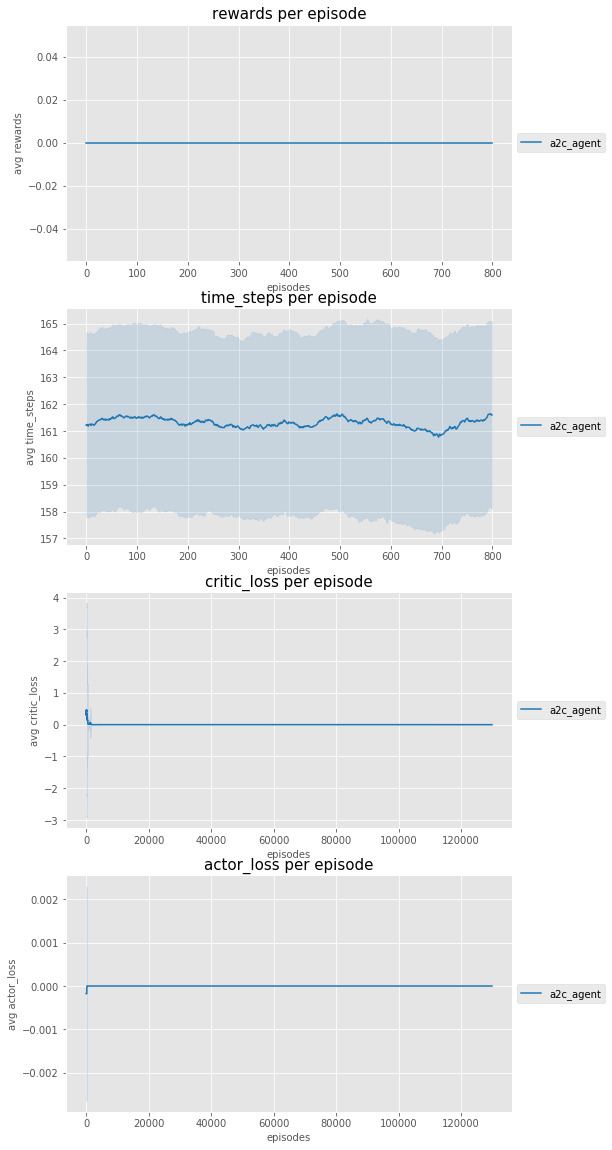

In [30]:
train_session.plot_results(window=200, agent_subset=manual_agent_names)

In [11]:
env.close()